#### Name : Tanvir Ahammed Hridoy , ID : B180305020
#### Name : Susmita Rani Saha , ID : B180305047                            

# Linear Regression(Salary_dataset.csv) :

## 1. Exploratory Data Analysis

We'll load the data into a DataFrame using Pandas:

In [10]:
import pandas as pd

Let's read the CSV file and package it into a DataFrame:

In [11]:
path_to_file = 'Salary_dataset.csv'
df = pd.read_csv(path_to_file)

Once the data is loaded in, let's take a quick peek at the first 5 values using the head() method:

In [12]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


We can also check the shape of our dataset via the shape property:

In [13]:
df.shape

(30, 3)

 KEEPING ONLY THE 2 NECESSARY COLUMNS

In [14]:
df = df[["YearsExperience", "Salary"]]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


We'll plot one variable on the X-axis and other variable on the Y-axis, to explore relationships between variables is through Scatterplots. 

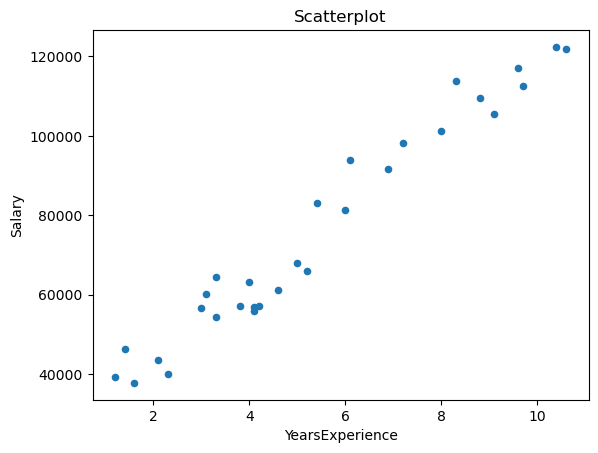

In [15]:
df.plot.scatter(x='YearsExperience', y='Salary', title='Scatterplot');

The corr() method calculates and displays the correlations between numerical variables in a DataFrame.
This time using Seaborn's heatmap() to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

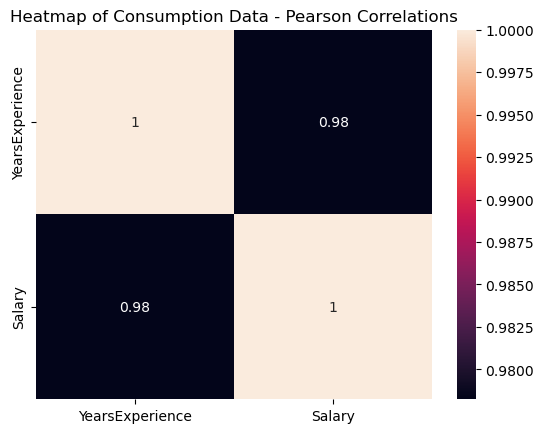

In [16]:
import seaborn as sns 
correlations=df.corr()
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

Pandas also ships with a great helper method for statistical summaries, and we can describe() the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns:

In [17]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


## 2. Data Preprocessing
we can divide our data in two arrays - one for the dependent feature and one for the independent, or target feature.

In [19]:
y = df['YearsExperience'].values.reshape(-1, 1)
X = df['Salary'].values.reshape(-1, 1)

without reshaping:

In [21]:
print(df['Salary'].values) 
print(df['Salary'].values.shape)

[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]
(30,)


After reshaping:

In [22]:
print(X.shape)
print(X)  

(30, 1)
[[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]


This is easily achieved through the helper train_test_split() method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size. The test_size is the percentage of the overall data we'll be using for testing.

In [23]:
from sklearn.model_selection import train_test_split

Since the sampling process is inherently random, we will always have different results when running the method. To be able to have the same results, or reproducible results, we can define a constant called SEED that has the value of 42.We can then pass that SEEDto the random_state parameter of our train_test_split method:

In [24]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [25]:
print(X_train)
print(y_train)

[[122392.]
 [109432.]
 [ 56958.]
 [ 39344.]
 [ 39892.]
 [ 66030.]
 [ 56643.]
 [ 57082.]
 [ 55795.]
 [101303.]
 [ 46206.]
 [ 37732.]
 [105583.]
 [ 43526.]
 [ 98274.]
 [116970.]
 [ 81364.]
 [121873.]
 [ 91739.]
 [ 54446.]
 [ 63219.]
 [ 61112.]
 [ 93941.]
 [ 60151.]]
[[10.4]
 [ 8.8]
 [ 4.1]
 [ 1.2]
 [ 2.3]
 [ 5.2]
 [ 3. ]
 [ 4.2]
 [ 4.1]
 [ 8. ]
 [ 1.4]
 [ 1.6]
 [ 9.1]
 [ 2.1]
 [ 7.2]
 [ 9.6]
 [ 6. ]
 [10.6]
 [ 6.9]
 [ 3.3]
 [ 4. ]
 [ 4.6]
 [ 6.1]
 [ 3.1]]


##  3.Training a Linear Regression Model
We have our train and test sets ready. Scikit-Learn has a plethora of model types we can easily import and train, LinearRegression being one of them:

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Now, we need to fit the line to our data, we will do that by using the .fit() method along with our X_train and y_train data:

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

we can inspect the intercept and slope by printing the regressor.intecept_ and regressor.coef_ attributes, respectively:

In [28]:
print(regressor.intercept_)

[-2.30785245]


In [29]:
print(regressor.coef_)

[[0.00010235]]


In [30]:
y_pred = regressor.predict(X_test)

## 4.Making Predictions
To make predictions on the test data, we pass the X_test values to the predict() method. We can assign the results to the variable y_pred:

In [31]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)


   Actual  Predicted
0     9.7   9.220593
1     5.0   4.645795
2     8.3   9.341061
3     5.4   6.196418
4     3.3   4.288282
5     3.8   3.545621


The y_pred variable now contains all the predicted values for the input values in the X_test. We can now compare the actual output values for X_test with the predicted values, by arranging them side by side in a dataframe structure:

In [32]:
regressor.score(X_test,y_test)

0.9039484379486218

## 5.Evaluating the Model
regression models, three evaluation metrics are mainly used.
Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE).
We can use any of those three metrics to compare models (if we need to choose one). We can also compare the same regression model with different argument values or with different data and then consider the evaluation metrics. This is known as hyperparameter tuning - tuning the hyperparameters that influence a learning algorithm and observing the results.

First, we will import the necessary modules for calculating the MAE and MSE errors. Respectively, the mean_absolute_error and mean_squared_error:

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
import numpy as np

We will also print the metrics results using the f string and the 2 digit precision after the comma with :.2f:

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.65
Mean squared error: 0.52
Root mean squared error: 0.72
